# 8. 클러스터링

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [53]:
data = pd.read_excel('C:/Users/subin/Desktop/Documents_Capstone/계층클러스터링/클러스터링_데이터.xlsx')

In [54]:
data.head()

,Unnamed: 0,area,2013,2014,2015,2016,2017,2018
0,0,수궁동_중,33179,32972,34879,36522,36331,44208
1,1,수궁동_소,30175,30902,32040,34716,36441,38514
2,2,수궁동_대,44723,44186,40640,46652,46607,49682
3,3,풍납2동_중,43032,44835,47449,50768,55987,72262
4,4,풍납2동_소,31302,32117,34266,36414,37935,49201


In [55]:
data = data.drop('Unnamed: 0',axis = 1)
data = data.drop('area',axis = 1)

In [56]:
data

,2013,2014,2015,2016,2017,2018
0,33179,32972,34879,36522,36331,44208
1,30175,30902,32040,34716,36441,38514
2,44723,44186,40640,46652,46607,49682
3,43032,44835,47449,50768,55987,72262
4,31302,32117,34266,36414,37935,49201
...,...,...,...,...,...,...
817,16306,16581,17787,19858,22441,24956
818,32723,32827,34965,37701,40226,44212
819,49876,55876,59771,66671,74195,92848
820,38388,40073,45236,51188,60898,73934


In [57]:
X = np.array(data)

In [58]:
def elbow(x):
    sse=[]
    for i in range(1,30):
        km = KMeans(n_clusters=i,init='k-means++')
        km.fit(x)
        sse.append(km.inertia_)
    
    plt.plot(range(1,30),sse,marker='o')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show()

C:\Users\subin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\subin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\subin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\subin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\subin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\subin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from c

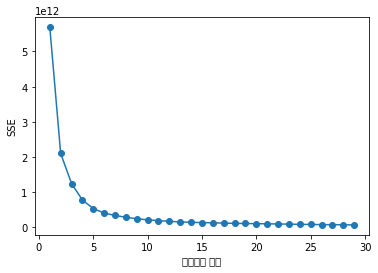

In [59]:
elbow(X)

In [60]:
>>> from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,init='k-means++').fit(X)

In [61]:
y_predict = kmeans.fit_predict(X)

In [62]:
data['cluster'] = 0

In [63]:
for i in range(len(data)):
    data['cluster'][i] = y_predict[i]

In [64]:
data.head()

,2013,2014,2015,2016,2017,2018,cluster
0,33179,32972,34879,36522,36331,44208,2
1,30175,30902,32040,34716,36441,38514,2
2,44723,44186,40640,46652,46607,49682,2
3,43032,44835,47449,50768,55987,72262,2
4,31302,32117,34266,36414,37935,49201,2


In [65]:
data.to_excel('C:/Users/subin/Desktop/Documents_Capstone/계층클러스터링/k-mean.xlsx')